# Brain Tomur Detection using Deep Learning

In [22]:
# Required Libraries

import numpy as np 
import cv2
import os
import umap
from PIL import Image
from os import listdir
from os.path import isfile, join
from collections import Counter
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow import keras
import pandas as pd
from keras.callbacks import EarlyStopping

# Data Set
Data Set downloaded from https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection

# Accessing Images of Two Classes, Yes and No

In [3]:
yes_class=os.listdir("C://BrainTumorData//brain-mri-images-for-brain-tumor-detection//brain_tumor_dataset//yes")
no_class=os.listdir("C://BrainTumorData//brain-mri-images-for-brain-tumor-detection//brain_tumor_dataset//no")

# Concatenating Images of Two classes (yes and no) and generate one Class of all amages

In [4]:
data=np.concatenate([yes_class,no_class])

# Generating label for Images, 1 for yes class and 0 for no class

In [5]:

lable_x_class=np.ones(len(yes_class))
lable_y_class=np.zeros(len(no_class))
Lable_Data=np.concatenate([lable_x_class,lable_y_class])
Lable_Data

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [6]:
print("Number of images in class no: ",lable_y_class.shape)
print("Number of images in class yes: ",lable_x_class.shape)

Number of images in class no:  (98,)
Number of images in class yes:  (155,)


In [7]:
yes_class_imgs=os.listdir("C://BrainTumorData//brain-mri-images-for-brain-tumor-detection//yes")
no_class_imgs=os.listdir("C://BrainTumorData//brain-mri-images-for-brain-tumor-detection//no")

# Reading Images of yes class and converting them to array

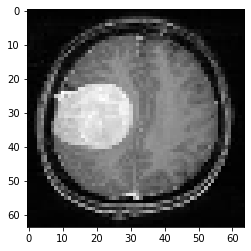

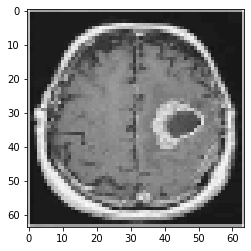

In [17]:
X_data=[]
for image in yes_class_imgs:
    img=cv2.imread("C://Users//bidar20m//Desktop//BrainTumorData//brain-mri-images-for-brain-tumor-detection//yes//"+image)
    Rev_Img = cv2.resize(img, (64, 64) )
    (b, g, r)=cv2.split(Rev_Img) 
    Rev_Img=cv2.merge([r,g,b])
    if (len(X_data)<2):
        plt.imshow(Rev_Img, interpolation='nearest')
        plt.show()
    X_data.append(Rev_Img)
    

# Reading Images of no class and converting them to array

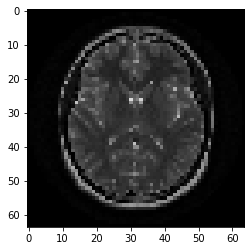

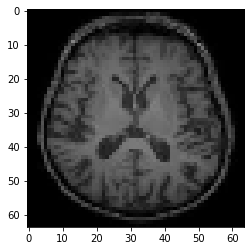

In [18]:
i=0
for image in no_class_imgs:
    img = cv2.imread('C://Users//bidar20m//Desktop//BrainTumorData//brain-mri-images-for-brain-tumor-detection//no//'+image)
    Rev_Img = cv2.resize(img, (64, 64) )
    (b, g, r)=cv2.split(Rev_Img) 
    Rev_Img=cv2.merge([r,g,b])
    if (i<2):
        plt.imshow(Rev_Img, interpolation='nearest')
        plt.show()
        i=i+1
    X_data.append(Rev_Img)

# Preparing train and test data
1. shuffle all the images usnig shuffle_images function
2. Trime data (Squeezing and nomalizing data) using Trime_data function
3. Spliting data using split_data function

In [19]:
# Shuffeling the data to improve the performance of the model

def shuffle_images(X_data,Lable_Data):
    df=pd.DataFrame()
    df['IMG']=X_data
    df['lable']=Lable_Data
    shuffled=df.iloc[np.random.permutation(len(df))]
    x_data=list(shuffled['IMG'])
    lable_data=list(shuffled['lable'])
    return x_data, lable_data 

x_data, lable_data=shuffle_images(X_data,Lable_Data)

#Triming and Normalizing the data

def Trim_data(X):
    X = np.squeeze(X)
    X = X.astype('float32')
    X=X/255
    return X

# Spliting data to training set, testing set and validation set

def splite_data(X, Train_per):
    X=Trim_data(X)
    N_train=int(np.ceil(Train_per*(len(X))))
    N_val=int(len(X)-N_train)
    
    (x_train, y_train), (x_test, y_test) = (X[:N_train],lable_data[:N_train]) , (X[N_train:] , lable_data[N_train:])
    (x_valid , y_valid) = (x_test[:N_val], y_test[:N_val])
    
    return (x_train, y_train), (x_test, y_test),(x_valid , y_valid)

(x_train, y_train), (x_test, y_test),(x_valid , y_valid)=splite_data(x_data,Train_per=.75)

# Neural Network with Keras for Brain Tumor Detection

In [20]:
model=tf.keras.models.Sequential([
                              keras.layers.Conv2D(16, 9, activation="relu", padding="SAME",kernel_initializer='he_uniform',input_shape=(64,64,3)),
                              keras.layers.MaxPooling2D(2),
                               
                              keras.layers.Conv2D(16,9, activation="relu", padding="SAME",kernel_initializer='he_uniform'),
                              keras.layers.Conv2D(16,9, activation="relu", padding="SAME",kernel_initializer='he_uniform'),
                              keras.layers.MaxPooling2D(2),
                               
                              keras.layers.Conv2D(36, 9, activation="relu", padding="SAME",kernel_initializer='he_uniform'),
                              keras.layers.Conv2D(36, 9, activation="relu", padding="SAME",kernel_initializer='he_uniform'),
                              keras.layers.MaxPooling2D(2),
    
                              keras.layers.Flatten(),
    
                              keras.layers.Dense(512, activation="relu",kernel_initializer='he_uniform'),
                              keras.layers.Dropout(0.5),
    
                              keras.layers.Dense(256, activation="relu",kernel_initializer='he_uniform'),
                              keras.layers.Dropout(0.5),
    
                              keras.layers.Dense(256, activation="relu",kernel_initializer='he_uniform'),
                              keras.layers.Dropout(0.5),
                              
                              keras.layers.Dense(256, activation="relu",kernel_initializer='he_uniform'),
                              keras.layers.Dropout(0.5),
    
                              keras.layers.Dense(1, activation="sigmoid")
                             ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 16)        3904      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 16)        20752     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 16)        20752     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 36)        46692     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 36)       

# Compiling the Model
We use EarlyStopping inorder to avoid overfitting

In [23]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])
early_stopping_monitor =EarlyStopping(patience=10)

# Training the Model

In [28]:
history=model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),callbacks = [early_stopping_monitor])

Train on 190 samples, validate on 63 samples
Epoch 1/150
190/190 [==============================] - 2s 10ms/sample - loss: 0.1120 - acc: 0.9789 - val_loss: 0.7652 - val_acc: 0.8254
Epoch 2/150
190/190 [==============================] - 2s 9ms/sample - loss: 0.1048 - acc: 0.9632 - val_loss: 1.0137 - val_acc: 0.8254
Epoch 3/150
190/190 [==============================] - 2s 9ms/sample - loss: 0.1627 - acc: 0.9263 - val_loss: 0.9016 - val_acc: 0.7460
Epoch 4/150
190/190 [==============================] - 2s 9ms/sample - loss: 0.1439 - acc: 0.9474 - val_loss: 1.3751 - val_acc: 0.7937
Epoch 5/150
190/190 [==============================] - 2s 9ms/sample - loss: 0.1809 - acc: 0.9421 - val_loss: 0.7196 - val_acc: 0.8254
Epoch 6/150
190/190 [==============================] - 2s 9ms/sample - loss: 0.0961 - acc: 0.9737 - val_loss: 0.7114 - val_acc: 0.8095
Epoch 7/150
190/190 [==============================] - 2s 9ms/sample - loss: 0.1440 - acc: 0.9474 - val_loss: 0.5694 - val_acc: 0.8571
Epoch 8/1

In [29]:
# Evaluate the model on test set
accuracy= model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Model Accuracy:', accuracy[1])



 Model Accuracy: 0.82539684


# Testing the model

predicted index and true index are:  1 1
predicted index and true index are:  0 0
predicted index and true index are:  0 1
predicted index and true index are:  1 1
predicted index and true index are:  0 1
predicted index and true index are:  0 0
predicted index and true index are:  1 1
predicted index and true index are:  0 0
predicted index and true index are:  0 1
predicted index and true index are:  0 0
predicted index and true index are:  0 0
predicted index and true index are:  0 0
predicted index and true index are:  1 1
predicted index and true index are:  0 0
predicted index and true index are:  1 1


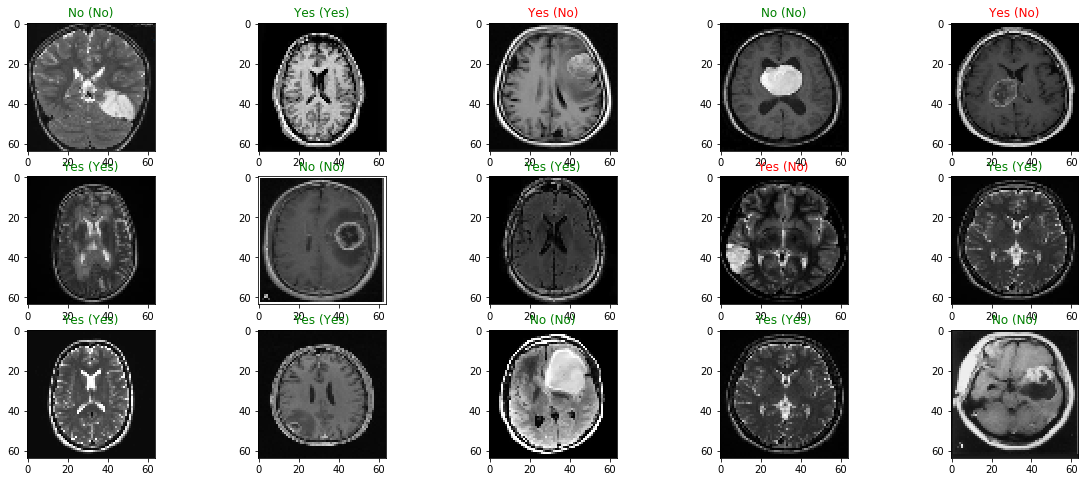

In [95]:
Pred_model= model.predict(x_test)
labels =["Yes","No"]
ind=[]
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    sub_img = figure.add_subplot(3, 5, i+1)
    ind.append(index)
   
    sub_img .imshow(np.squeeze(x_test[index]))
    predict_index = int(Pred_model[index])
    true_index = int(y_test[index])
    
    
    print("predicted index and true index are: ", predict_index, true_index)
    # Set the title for each image
    sub_img .set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

